In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import json 

import matplotlib
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cars.csv')
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [3]:
df.Brand.value_counts()

Brand
Ford          11
Hyundai       11
Tata          11
Toyota        10
Volkswagen    10
Audi          10
BMW           10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64

In [4]:
df = pd.get_dummies(df, columns=['Brand'],dtype=int)

In [5]:
df.Year.value_counts()

Year
2018    28
2019    28
2017    21
2020    17
2016     4
2021     2
Name: count, dtype: int64

In [6]:
df = df.drop('Model',axis=1)
df

,Car_ID,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
0,1,2018,50000,Petrol,Manual,First,15,1498,108,5,...,0,0,0,0,0,0,0,0,1,0
1,2,2019,40000,Petrol,Automatic,Second,17,1597,140,5,...,0,0,1,0,0,0,0,0,0,0
2,3,2017,20000,Petrol,Automatic,First,10,4951,395,4,...,0,1,0,0,0,0,0,0,0,0
3,4,2020,30000,Diesel,Manual,Third,23,1248,74,5,...,0,0,0,0,0,1,0,0,0,0
4,5,2016,60000,Diesel,Automatic,Second,18,1999,194,5,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2019,22000,Diesel,Automatic,First,16,1950,191,5,...,0,0,0,0,0,0,1,0,0,0
96,97,2017,38000,Diesel,Manual,Second,13,2755,171,7,...,0,0,0,0,0,0,0,0,1,0
97,98,2018,26000,Petrol,Manual,Third,18,1497,121,5,...,0,1,0,0,0,0,0,0,0,0
98,99,2019,24000,Petrol,Automatic,Second,17,1497,113,5,...,0,0,0,1,0,0,0,0,0,0


<Axes: >

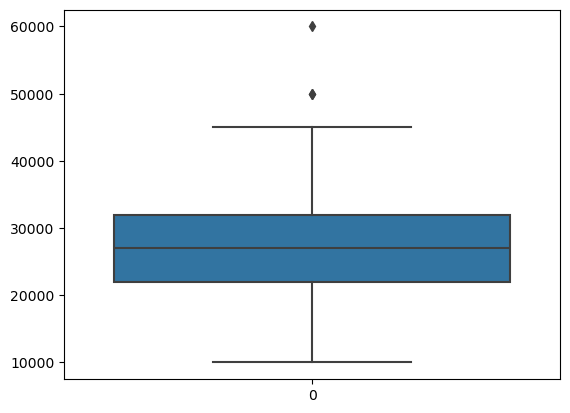

In [7]:
sns.boxplot(df.Kilometers_Driven)

In [8]:
q1 = df.Kilometers_Driven.quantile(0.25)
q3 = df.Kilometers_Driven.quantile(0.75)
iqr = q3-q1
uppar_km = q3 + 1.5*iqr
uppar_km

47000.0

In [9]:
df.Kilometers_Driven = np.where(df.Kilometers_Driven>uppar_km, uppar_km,df.Kilometers_Driven)

In [10]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [11]:
df.Fuel_Type = df.Fuel_Type.replace({'Petrol':0,'Diesel':1})
df.Fuel_Type.value_counts()

Fuel_Type
0    52
1    48
Name: count, dtype: int64

In [12]:
df.Transmission.value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [13]:
df.Transmission = df.Transmission.replace({'Automatic':0,'Manual':1})
df.Transmission.value_counts()

Transmission
0    57
1    43
Name: count, dtype: int64

In [14]:
df.Owner_Type.value_counts()

Owner_Type
First     44
Second    43
Third     13
Name: count, dtype: int64

In [15]:
df.Owner_Type = df.Owner_Type.replace({'First':1,'Second':2,'Third':3})
df.Owner_Type.value_counts()

Owner_Type
1    44
2    43
3    13
Name: count, dtype: int64

<Axes: >

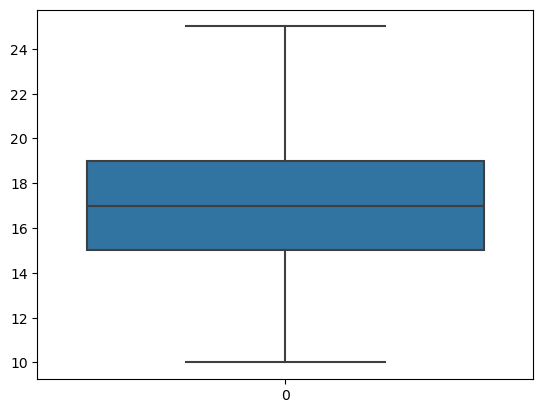

In [16]:
sns.boxplot(df.Mileage)

<Axes: >

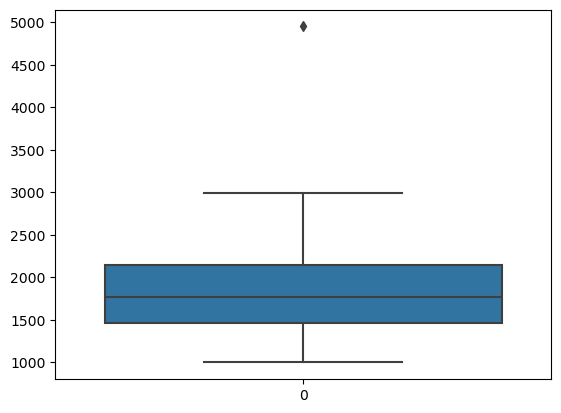

In [17]:
sns.boxplot(df.Engine)

In [18]:
q1 = df.Engine.quantile(0.25)
q3 = df.Engine.quantile(0.75)
iqr = q3 - q1
uppar_eng = q3 + 1.5* iqr
uppar_eng

3164.5

In [19]:
df.Engine = np.where(df.Engine>uppar_eng,uppar_eng,df.Engine)

<Axes: >

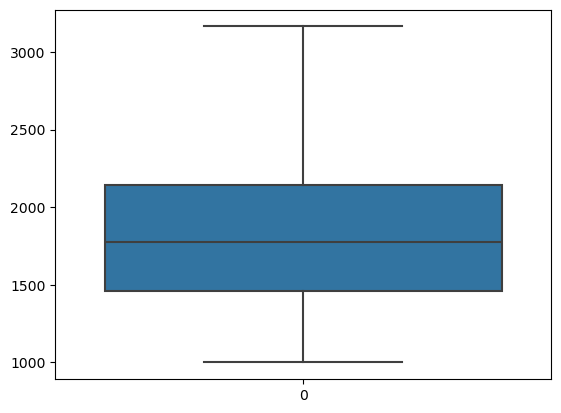

In [20]:
sns.boxplot(df.Engine)

<Axes: >

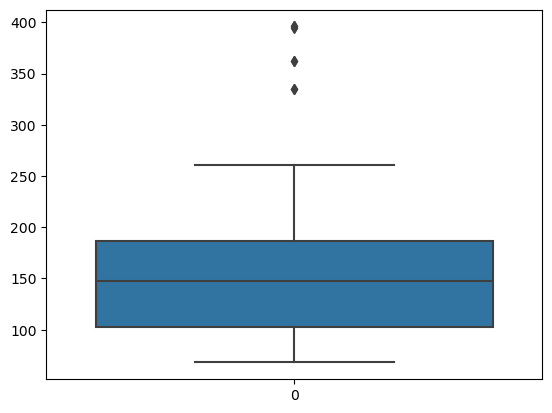

In [21]:
sns.boxplot(df.Power)

In [22]:
q1 = df.Power.quantile(0.25)
q3 = df.Power.quantile(0.75)
iqr = q3-q1
uppar_pow = q3 + 1.5*iqr
uppar_pow

313.0

In [23]:
df.Power = np.where(df.Power>uppar_pow,uppar_pow,df.Power)

<Axes: >

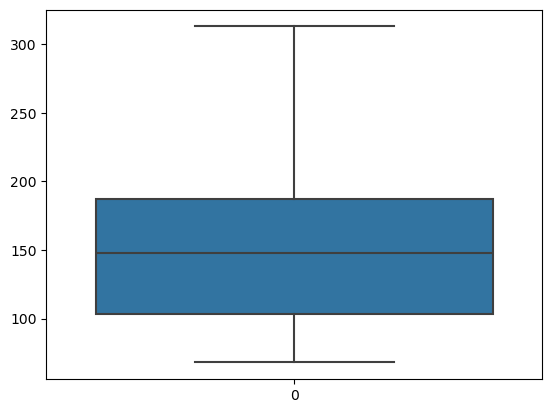

In [24]:
sns.boxplot(df.Power)

In [25]:
x = df.drop('Price',axis=1)
y = df.Price

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [26]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [27]:
def evolution(string, model, ind_var, y_act):
    print(string.center(50))
    pred = model.predict(ind_var)

    mse = mean_squared_error(y_act,pred)
    print('MSE is',mse)

    rmse = np.sqrt(mse)
    print('RMSE is',rmse)

    mae = mean_absolute_error(y_act,pred)
    print('Mean Absoute Error is',mae)

    r_squared = r2_score(y_act, pred)
    print('R2 score is', r_squared)

    adj_r2 = 1 - (((1-r_squared)*(ind_var.shape[0] - 1))/(ind_var.shape[0]- ind_var.shape[1]-1))
    print('Adjusted R2 score is', adj_r2)

evolution('Test Data Evolution',linear_reg, x_test, y_test)
print()

evolution('Train Data EVolution',linear_reg, x_train, y_train)

               Test Data Evolution                
MSE is 57666170333.99365
RMSE is 240137.81529362185
Mean Absoute Error is 191672.00515600145
R2 score is 0.8724905023018382
Adjusted R2 score is 2.2113402281325367

               Train Data EVolution               
MSE is 44036073737.84015
RMSE is 209847.73941560616
Mean Absoute Error is 161217.29792131408
R2 score is 0.9588029200352319
Adjusted R2 score is 0.9438867359100573


In [28]:
q= x.head(1).T
q

,0
Car_ID,1.0
Year,2018.0
Kilometers_Driven,47000.0
Fuel_Type,0.0
Transmission,1.0
Owner_Type,1.0
Mileage,15.0
Engine,1498.0
Power,108.0
Seats,5.0


In [29]:
a = np.array([1.0, 2018.0, 47000.0, 0, 1.0, 1.0, 15.0, 1498.0, 108.0, 5.0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 1.0, 0])
a

array([1.000e+00, 2.018e+03, 4.700e+04, 0.000e+00, 1.000e+00, 1.000e+00,
       1.500e+01, 1.498e+03, 1.080e+02, 5.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00])

In [30]:
linear_reg.predict([a])   # we are getiing prediction right

array([847560.38525173])

In [35]:
col_names = x_train.columns
col_names

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand_Audi',
       'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata',
       'Brand_Toyota', 'Brand_Volkswagen'],
      dtype='object')

In [36]:
project_data = {'Fuel_type':{'Petrol':0,'Diesel':1},
               'Transmission':{'Automatic':0,'Manual':1},
               'Owner_type':{'First':1,'Second':2,'Third':3},
               'columns':list(col_names)}
print(project_data)

{'Fuel_type': {'Petrol': 0, 'Diesel': 1}, 'Transmission': {'Automatic': 0, 'Manual': 1}, 'Owner_type': {'First': 1, 'Second': 2, 'Third': 3}, 'columns': ['Car_ID', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen']}


In [42]:
Car_ID=1.0
Year=2018.0
Kilometers_Driven=47000.0
Fuel_type='Petrol'
Transmission='Manual'
Owner_type='First'
Mileage=15.0
Engine=1498.0
Power=108.0
Seats=5.0
Brand='Toyota'

#price = ?

In [43]:
arr1 = np.zeros(21)

arr1[0]=Car_ID
arr1[1]=Year
arr1[2]=Kilometers_Driven
arr1[3]=project_data['Fuel_type'][Fuel_type]
arr1[4]=project_data['Transmission'][Transmission]
arr1[5]=project_data['Owner_type'][Owner_type]
arr1[6]=Mileage
arr1[7]=Engine
arr1[8]=Power
arr1[9]=Seats
brand_val = 'Brand_' + Brand
brand_index = project_data['columns'].index(brand_val)
arr1[brand_index] = 1

arr1


array([1.000e+00, 2.018e+03, 4.700e+04, 0.000e+00, 1.000e+00, 1.000e+00,
       1.500e+01, 1.498e+03, 1.080e+02, 5.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00])

In [109]:
brand_val = 'Brand_'+ Brand     # it will concatinate and give us the answer
brand_val = np.where(col_names == brand_val)[0][0]
brand_val

19

In [110]:
result = linear_reg.predict([arr1])[0]
print(f'Price of the Seleted Car is {round(result,2)}')

Price of the Seleted Car is 847560.39


In [111]:
with open('Linear_mod_data.pkl','wb') as f:
    pickle.dump(linear_reg,f)
    

In [113]:
with open('Project_data1.json','w') as f:
    json.dump(project_data,f)